In [1]:
import pandas as pd
data= pd.read_csv("C:\\Users\\rinuc\\Downloads\\my_movies.csv")

In [2]:
!pip install mlxtend


In [3]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Converting the data to a format supported by mlxtend
# Replace missing values with 0 and encode categorical variables
data_encoded = pd.get_dummies(data.drop(['V1', 'V2', 'V3', 'V4', 'V5'], axis=1))




In [4]:
# Apriori algorithm

frequent_itemsets = apriori(data_encoded, min_support=0.1, use_colnames=True)



C:\Users\rinuc\anaconda3\anaconda new\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\rinuc\anaconda3\anaconda new\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [5]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)



C:\Users\rinuc\anaconda3\anaconda new\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:

print(rules)

                antecedents                                      consequents  \
0               (Gladiator)                                    (Sixth Sense)   
1             (Sixth Sense)                                      (Gladiator)   
2                   (LOTR1)                                    (Sixth Sense)   
3           (Harry Potter1)                                    (Sixth Sense)   
4                 (Patriot)                                    (Sixth Sense)   
..                      ...                                              ...   
211  (LOTR2, Harry Potter1)                 (Green Mile, Sixth Sense, LOTR1)   
212                 (LOTR1)  (Green Mile, LOTR2, Sixth Sense, Harry Potter1)   
213            (Green Mile)       (LOTR2, Harry Potter1, Sixth Sense, LOTR1)   
214                 (LOTR2)  (Green Mile, Harry Potter1, Sixth Sense, LOTR1)   
215         (Harry Potter1)          (Green Mile, LOTR2, Sixth Sense, LOTR1)   

     antecedent support  consequent sup

C:\Users\rinuc\anaconda3\anaconda new\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
print("Number of rules:", len(rules))

Number of rules: 216


C:\Users\rinuc\anaconda3\anaconda new\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
min_support_values = [0.1, 0.2, 0.3]
min_confidence_values = [0.5, 0.6, 0.7]

for min_support in min_support_values:
    for min_confidence in min_confidence_values:
        frequent_itemsets = apriori(data[['Sixth Sense', 'Gladiator', 'LOTR1', 'Harry Potter1', 'Patriot', 
                                         'LOTR2', 'Harry Potter2', 'LOTR', 'Braveheart', 'Green Mile']], 
                                    min_support=min_support, use_colnames=True)
        
        rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=min_confidence)
        print(f"Min Support: {min_support}, Min Confidence: {min_confidence}, Number of Rules: {len(rules)}")


Min Support: 0.1, Min Confidence: 0.5, Number of Rules: 216
Min Support: 0.1, Min Confidence: 0.6, Number of Rules: 134
Min Support: 0.1, Min Confidence: 0.7, Number of Rules: 129
Min Support: 0.2, Min Confidence: 0.5, Number of Rules: 15
Min Support: 0.2, Min Confidence: 0.6, Number of Rules: 14
Min Support: 0.2, Min Confidence: 0.7, Number of Rules: 9
Min Support: 0.3, Min Confidence: 0.5, Number of Rules: 12
Min Support: 0.3, Min Confidence: 0.6, Number of Rules: 11
Min Support: 0.3, Min Confidence: 0.7, Number of Rules: 6


C:\Users\rinuc\anaconda3\anaconda new\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\rinuc\anaconda3\anaconda new\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\rinuc\anaconda3\anaconda new\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\rinuc\anaconda3\anac

C:\Users\rinuc\anaconda3\anaconda new\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


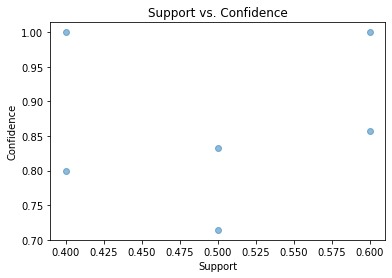

In [19]:
import matplotlib.pyplot as plt
import networkx as nx

plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence')
plt.show()

C:\Users\rinuc\anaconda3\anaconda new\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 720x432 with 0 Axes>

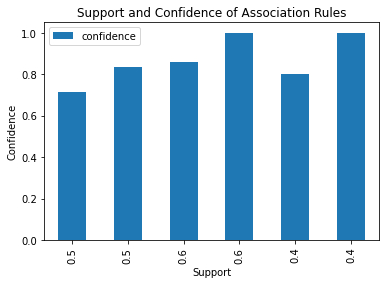

In [21]:
# Plot bar chart for support and confidence of association rules
plt.figure(figsize=(10, 6))
rules.plot(kind='bar', x='support', y='confidence')
plt.title('Support and Confidence of Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()


C:\Users\rinuc\anaconda3\anaconda new\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\rinuc\anaconda3\anaconda new\lib\site-packages\squarify\__init__.py:231: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap()


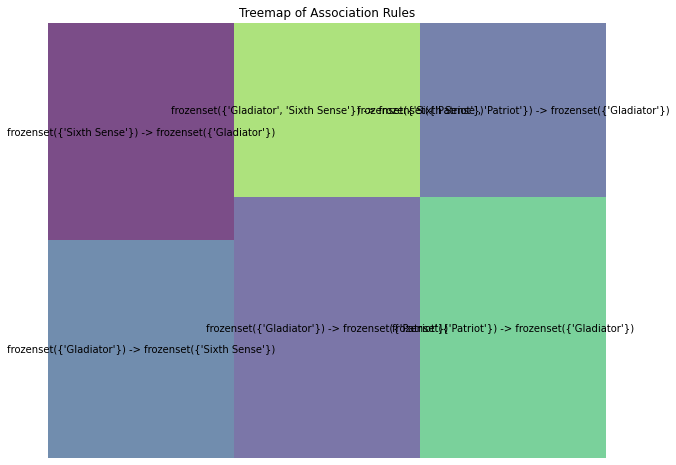

In [23]:
!pip install squarify
import squarify

# Create a treemap of association rules
plt.figure(figsize=(10, 8))
squarify.plot(sizes=rules['support'], label=rules['antecedents'].astype(str) + ' -> ' + rules['consequents'].astype(str), alpha=0.7)
plt.title('Treemap of Association Rules')
plt.axis('off')
plt.show()


C:\Users\rinuc\anaconda3\anaconda new\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\rinuc\anaconda3\anaconda new\lib\site-packages\seaborn\cm.py:1582: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  mpl_cm.register_cmap(_name, _cmap)
C:\Users\rinuc\anaconda3\anaconda new\lib\site-packages\seaborn\cm.py:1583: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  mpl_cm.register_cmap(_name + "_r", _cmap_r)
C:\Users\rinuc\a

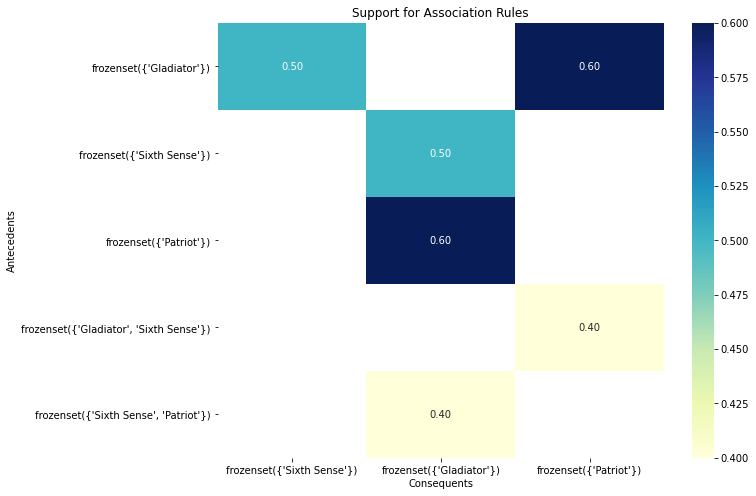

In [20]:
import seaborn as sns
# Create a pivot table of association rules
pivot_table = rules.pivot(index='antecedents', columns='consequents', values='support')
#heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Support for Association Rules')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()

In [31]:
#Change the minimum length in apriori algorithm
min_length_values = [2, 3, 4]
min_support = 0.1
min_confidence = 0.5

for min_length in min_length_values:
    frequent_itemsets = apriori(data[['Sixth Sense', 'Gladiator', 'LOTR1', 'Harry Potter1', 'Patriot', 
                                     'LOTR2', 'Harry Potter2', 'LOTR', 'Braveheart', 'Green Mile']], 
                                min_support=min_support, use_colnames=True)
   
    frequent_itemsets_filtered = frequent_itemsets[[len(itemset) >= min_length for itemset in frequent_itemsets['itemsets']]]
    print(f"Frequent Itemsets with Minimum Length {min_length}:")
    print(frequent_itemsets_filtered)
    


Frequent Itemsets with Minimum Length 2:
    support                                           itemsets
10      0.5                           (Gladiator, Sixth Sense)
11      0.1                               (Sixth Sense, LOTR1)
12      0.1                       (Harry Potter1, Sixth Sense)
13      0.4                             (Patriot, Sixth Sense)
14      0.1                               (LOTR2, Sixth Sense)
15      0.1                                (LOTR, Sixth Sense)
16      0.2                          (Green Mile, Sixth Sense)
17      0.6                               (Gladiator, Patriot)
18      0.1                                  (Gladiator, LOTR)
19      0.1                            (Braveheart, Gladiator)
20      0.1                            (Green Mile, Gladiator)
21      0.1                             (Harry Potter1, LOTR1)
22      0.2                                     (LOTR2, LOTR1)
23      0.1                                (Green Mile, LOTR1)
24      0.1   

C:\Users\rinuc\anaconda3\anaconda new\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\rinuc\anaconda3\anaconda new\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\rinuc\anaconda3\anaconda new\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\rinuc\anaconda3\anac

C:\Users\rinuc\anaconda3\anaconda new\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 864x576 with 0 Axes>

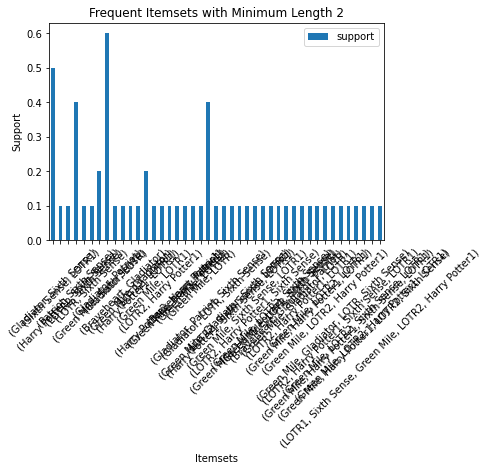

<Figure size 864x576 with 0 Axes>

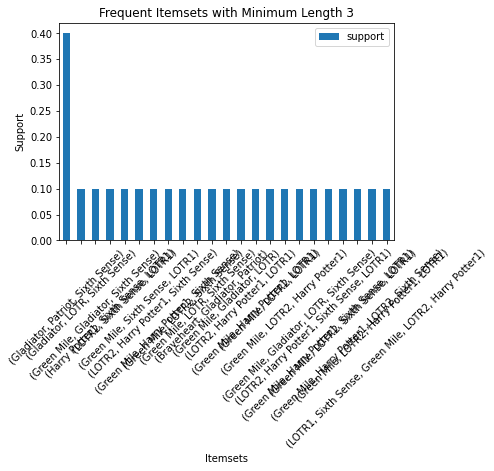

<Figure size 864x576 with 0 Axes>

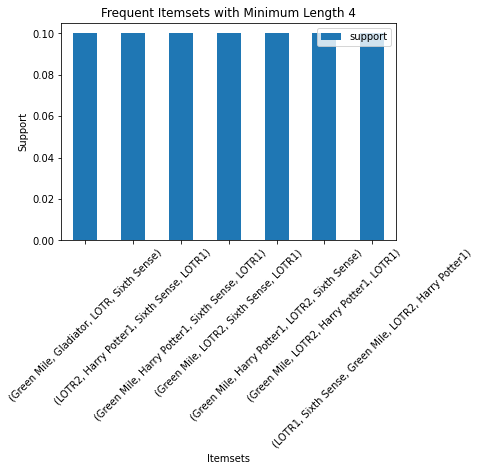

In [34]:
for min_length in min_length_values:
    frequent_itemsets_filtered = frequent_itemsets[[len(itemset) >= min_length for itemset in frequent_itemsets['itemsets']]]
    
    # Plotting the support of each itemset
    plt.figure(figsize=(12, 8))
    frequent_itemsets_filtered.plot(kind='bar', x='itemsets', y='support')
    plt.title(f'Frequent Itemsets with Minimum Length {min_length}')
    plt.xlabel('Itemsets')
    plt.ylabel('Support')
    plt.xticks(rotation=45)
    plt.show()